# Домашняя работа.
### Тема: **Работа с переменными**

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

Загружаем данные для проверки.

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

Смотрим, что содержит датасет.

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Смотрим информацию по столбцам в датасете. Все заполнены, пропусков нет.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Проверяем описание всего датасета.

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Обучаем модель стандартным образом и смотрим на то, что ошибка сама по себе достаточно небольшая.

In [7]:
x = data.loc[:, ~data.columns.isin(['MEDV'])]
y = data['MEDV']
reg = LinearRegression().fit(x, y)
print(f'Веса: {reg.coef_}')
print(f'Отклонение: {reg.intercept_}')
print(f'Ошибка: {mean_absolute_error(reg.predict(x), y)}')

Веса: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Отклонение: 36.45948838509004
Ошибка: 3.2708628109003177


Проверим столбец chas, как много домой не граничит с рекой. Получаем, что очень много (471 из 35) не граничит с рекой. Данные не сможем убрать.

In [8]:
data.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Проверяем на подозрительные большие максимумы у lstat и dis. Получаем, что там много различных значений и мы не сможем убрать данные данные. (небольшая тавтология :) )

In [9]:
print(data.LSTAT.value_counts())
print(data.DIS.value_counts())

14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
        ..
9.69     1
9.62     1
5.64     1
22.98    1
29.05    1
Name: LSTAT, Length: 455, dtype: int64
3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
         ..
1.7659    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64


In [10]:
x = data.loc[:, ~data.columns.isin(['MEDV'])]
y = data['MEDV']
reg = LinearRegression().fit(x, y)
print(f'Веса: {reg.coef_}')
print(f'Отклонение: {reg.intercept_}')
print(f'Ошибка: {mean_absolute_error(reg.predict(x), y)}')

Веса: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Отклонение: 36.45948838509004
Ошибка: 3.2708628109003177


Так же в столбцах crim и zn есть достаточно большие максимальные значения

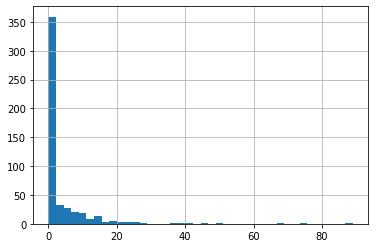

In [11]:
data['CRIM'].hist(bins=40)

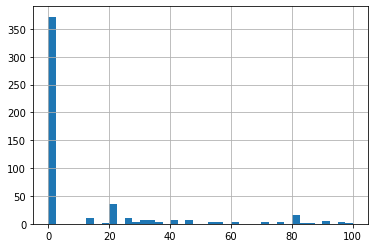

In [12]:
data['ZN'].hist(bins=40)

In [13]:
data[data['CRIM'] > 2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.90,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1


In [14]:
data[data['ZN'] > 2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2


Большую часть значений с CRIM мы сожем отбросить, но есть шанс потери данных, c ZN так сделать не получится.

In [15]:
print(data.CRIM.value_counts())
print(data.ZN.value_counts())

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64
0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64


Отбрасывает часть значений crim

In [16]:
data = data[data['CRIM'] < 2]

Обучаем модель и получаем уже куда более лучший результат.

In [17]:
x = data.loc[:, ~data.columns.isin(['MEDV'])]
y = data['MEDV']
reg = LinearRegression().fit(x, y)
print(f'Веса: {reg.coef_}')
print(f'Отклонение: {reg.intercept_}')
print(f'Ошибка: {mean_absolute_error(reg.predict(x), y)}')

Веса: [ 2.02257649  0.01896411  0.02324605  1.17052179 -8.57658735  9.19452923
 -0.05889293 -0.93926073  0.199756   -0.01065582 -0.63385695  0.01450401
 -0.03891743]
Отклонение: -14.346776778739912
Ошибка: 2.3046327108300493
